# ModelSelection - Results
Notebook to check results for model selection

In [1]:
import os
from working_dir import set_wd
set_wd()
os.getcwd()

'/home/tales/ds/kaggle/football-match-prediction'

In [2]:
# from pyspark.sql import SparkSession

# spark = SparkSession.builder.config("spark.sql.debug.maxToStringFields", 500) \
#                             .config("spark.driver.memory", "14g") \
#                             .appName("ModelSelection-Results").getOrCreate()

# spark.sparkContext.setLogLevel("ERROR")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from src.dao import dao, dao_processed, dao_ml
from src.utils import dflib, stats, pretties, plot, plot_domain, palette

In [4]:
pretties.max_data_frame_columns()

# Loading Results

In [5]:
results = dao_ml.load_all_results()
len(results)

119

In [6]:
rdf = pd.concat([pd.DataFrame(result) for result in results]).drop("which_dataset")
rdf["metrics_train_train"] = rdf["metrics_train_train"].astype(float)
rdf["metrics_train_valid"] = rdf["metrics_train_valid"].astype(float)

rdf["metrics_diff"] = rdf["metrics_train_train"] - rdf["metrics_train_valid"]

In [7]:
rdf.loc["log_loss"].sort_values("metrics_train_valid")

,missing_values_strategy,undersampling,num_trees,max_depth,subsampling_rate,metrics_train_train,metrics_train_valid,id_model,datetime,metrics_diff
log_loss,dropna,False,60,10,0.30,0.976563,0.999720,0567da63-1210-4986-b2d2-b3a51f6c1a31,2022-05-09 12:02:32,-2.315655e-02
log_loss,dropna,False,60,10,0.50,0.974017,0.999933,33d6ab27-cbec-4dee-97eb-f7c458f08724,2022-05-09 12:01:15,-2.591632e-02
log_loss,dropna,False,60,10,0.80,0.972004,1.000052,bec1296a-fb86-4c4d-9d19-a11d87f55ad7,2022-05-09 11:58:48,-2.804831e-02
log_loss,dropna,False,60,10,0.65,0.972972,1.000183,82a54410-c530-42c0-80cb-e976869562aa,2022-05-09 12:00:02,-2.721046e-02
log_loss,dropna,False,60,8,0.30,1.000054,1.001382,e2ab3e9a-353a-43fb-961a-a7d90906265a,2022-05-09 12:05:39,-1.328787e-03
...,...,...,...,...,...,...,...,...,...,...
log_loss,dropna,True,10,0,0.65,1.098613,1.098613,0efba7ff-0602-4380-ae19-96f0fcf061a8,2022-05-09 11:20:48,3.099743e-13
log_loss,dropna,True,10,0,0.30,1.098614,1.098614,4c00ec92-90ef-4755-9950-412c8f3ba079,2022-05-09 11:21:28,-1.090239e-13
log_loss,dropna,True,25,0,0.30,1.098614,1.098614,dc1300fe-7e46-4deb-a314-ded107d7114a,2022-05-09 11:08:04,4.209966e-13
log_loss,dropna,True,10,0,0.50,1.098615,1.098615,7276d137-ee96-449b-9a2e-c07b6d6b04ce,2022-05-09 11:21:08,-2.877698e-13


In [8]:
def overfitting_analysis_num(metrics_df, param_name, metric_colname, value_colnames_train, value_colnames_valid):
    metrics_df = metrics_df.loc[metric_colname].copy()
    
    of_data = metrics_df.groupby(param_name)[[value_colnames_train, value_colnames_valid]].mean().reset_index()
    title = f"{metric_colname} mean values for {param_name}"
    
    plt.figure(figsize=(8,5))
    plt.scatter(of_data[param_name], of_data[value_colnames_train], label="train", s=130, alpha=0.6)
    plt.scatter(of_data[param_name], of_data[value_colnames_valid], label="validation", s=130, alpha=0.6)
    plt.title(label=title)
    plt.xlabel(param_name)
    plt.ylabel(metric_colname)
    plt.legend()
    plt.show()
    
def overfitting_analysis_categ(metrics_df, param_name, metric_colname, value_colnames_train, value_colnames_valid):
    metrics_df = metrics_df.loc[metric_colname].copy()
    
    of_data = metrics_df.groupby(param_name)[[value_colnames_train, value_colnames_valid]].mean().reset_index()
    title = f"{metric_colname} mean values for {param_name}"
    
    display(of_data.set_index(param_name).transpose())
    of_data.set_index(param_name).plot.bar(title=title, rot=0, xlabel=param_name, ylabel=metric_colname,
                                           figsize=(8,5), alpha=0.7)
    plt.show()

#### <font color=black>subsampling_rate</font>

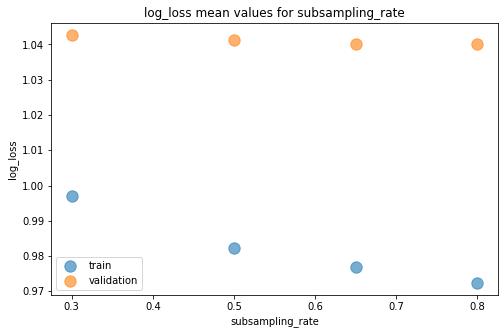

#### <font color=black>max_depth</font>

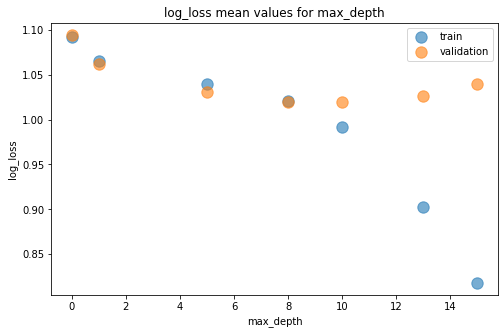

#### <font color=black>num_trees</font>

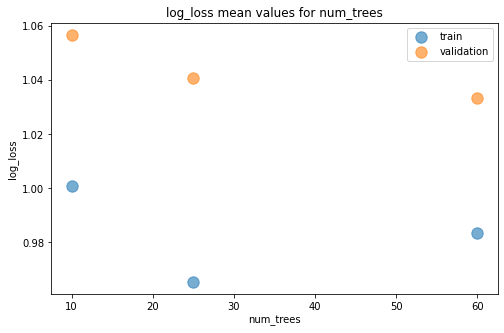

In [9]:
for param_name in ["subsampling_rate", "max_depth", "num_trees"]:
    pretties.md(param_name, size="####")
    overfitting_analysis_num(metrics_df=rdf, 
                             param_name=param_name, 
                             metric_colname="log_loss", 
                             value_colnames_train="metrics_train_train", 
                             value_colnames_valid="metrics_train_valid")

#### <font color=black>missing_values_strategy</font>

missing_values_strategy,dropna
metrics_train_train,0.982022
metrics_train_valid,1.040960


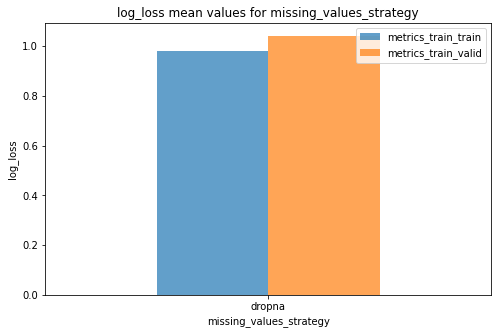

#### <font color=black>undersampling</font>

undersampling,False,True
metrics_train_train,0.946173,0.996959
metrics_train_valid,1.021687,1.048990


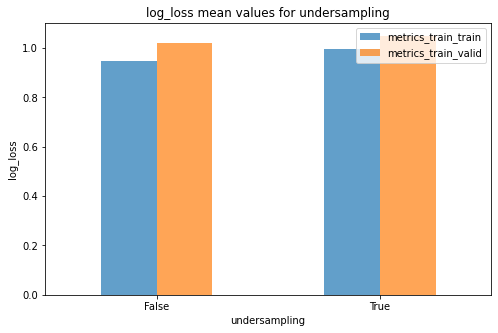

In [10]:
for param_name in ["missing_values_strategy", "undersampling"]:
    pretties.md(param_name, size="####")
    overfitting_analysis_categ(metrics_df=rdf, 
                                 param_name=param_name, 
                                 metric_colname="log_loss", 
                                 value_colnames_train="metrics_train_train", 
                                 value_colnames_valid="metrics_train_valid")